**PART-1 : ILPD**

**STEPS**

Downloaded the Indian Liver Patient Dataset from https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset).

Preprocessed the data to take care of null values, and replace the categorical attribute with multiple binary attributes using one-hot encoding.

Used random seed 633.
Divideed the dataset 70:30 into a training and a test set using random seed. 


**1.1.**	Learn a Logistic Regression classifier on the training set. Evaluate the classifier on the test set and compute the following evaluation measures: (i) Accuracy, Error Rate (ii) TPR, FPR, TNR, FNR  (iiI) Sensitivity, Specificity (iv) Precision, Recall, F-measure.

**1.2.**	The LR classifier returns a score (posterior probability) for each sample. Used this score to plot the ROC curve for the test set and compute the Area under the Curve (AUC).

**1.3.**	What evaluation metric matters most for this problem in your opinion, and why ? Pickd a desired value of that evaluation metric (e.g. such that FPR < 5%). Determined the optimal threshold on the score that achieves the desired value of your evaluation metric.

Repeatd 1.2 above but plot Precision vs Recall (PR curve) instead of ROC curve. When to prefer to use PR curve instead of ROC curve ?


Solution 1.1

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("ILPD.csv") 
data.isnull().sum() 

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TB.1        0
ALB         0
A/G         4
Patient     0
dtype: int64

In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Gender'.
data['A/G']=data['A/G'].fillna(value=data['A/G'].mean())
data['Gender']= label_encoder.fit_transform(data['Gender'])
data.isnull().sum() 

Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TB.1        0
ALB         0
A/G         0
Patient     0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Patient',axis=1)
y = data.Patient

X_test,X_train,y_test,y_train = train_test_split(X,y, test_size=0.3, random_state = 633)
print(X.shape)
print(y_test.shape)

(583, 10)
(408,)


In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=633)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[263,  36],
       [ 76,  33]])

Text(0.5, 257.44, 'Predicted label')

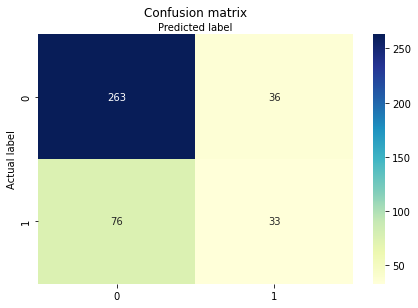

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
print(confusion_matrix.sum(axis=0)-np.diag(confusion_matrix))
print(confusion_matrix[1,0])

[76 36]
76


In [ ]:

# Tried differnt methods to exract data from confusion matrix
'''FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
TP = np.diag(confusion_matrix) - confusion_matrix.sum(axis=1)
TN = np.diag(confusion_matrix) - confusion_matrix.sum(axis=0)'''

'''TP = 263
TN = 33
FN = 36
FP = 76'''

TN = confusion_matrix[0,0]
FN = confusion_matrix[1,0]
FP = confusion_matrix[0,1]
TP = confusion_matrix[1,1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# Precision
precision = TP/(TP+FP)
# Recall
recall = TP/(FN+TP)
# F1 score, F Measure
f_measure = (2*(precision*recall))/(precision+recall)


# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)


# Print everything
print("Acc: "+ str(ACC))
print("TPR, Sensitivity: "+ str(TPR))
print("TNR, Specificity: "+ str(TNR))
print("FPR: "+ str(FPR))
print("FNR: "+ str(FNR))
print("precision: "+ str(precision))
print("recall: "+ str(recall))
print("f_measure: "+ str(f_measure))


# FOR VERIFICATION

from sklearn.metrics import precision_score, recall_score, f1_score
print('\nVERIFICATION')
print('Precision: ' + str (precision_score(y_test, y_pred)))
	
print('Recall: '+ str (recall_score(y_test, y_pred)))

print('f1_score, F Measure: '+ str (f1_score(y_test, y_pred)))

Acc: 0.16911764705882354
TPR, Sensitivity: 0.30275229357798167
TNR, Specificity: 0.12040133779264214
FPR: 0.8795986622073578
FNR: 0.6972477064220184
precision: 0.11148648648648649
recall: 0.30275229357798167
f_measure: 0.16296296296296298

VERIFICATION
Precision: 0.775811209439528
Recall: 0.8795986622073578
f1_score, F Measure: 0.8244514106583071


In [ ]:
# FOR VERIFICATION
from sklearn.metrics import classification_report
target_names = ['Patient', 'Not Patient']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Patient       0.78      0.88      0.82       299
 Not Patient       0.48      0.30      0.37       109

    accuracy                           0.73       408
   macro avg       0.63      0.59      0.60       408
weighted avg       0.70      0.73      0.70       408



In [ ]:
# FOR VERIFICATION
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print("accuracy: " + str(accuracy))
print("error rate : "+ str(1-accuracy))

accuracy: 0.7254901960784313
error rate : 0.27450980392156865


#### Solution 1.2

In [ ]:
from sklearn.metrics import roc_auc_score
probs = logreg.predict_proba(X_test)[:,1]
probs.shape
y_test.shape
auc = roc_auc_score(y_test, probs)
print("Areaa under the Curve: " +str(auc))

Areaa under the Curve: 0.7354791200024546


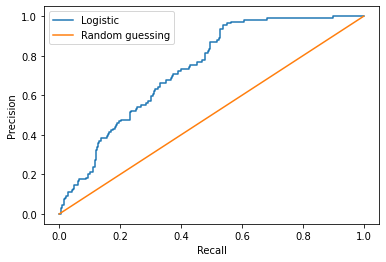

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, probs, pos_label=2)

# plot the precision-recall curves
plt.plot(fpr, tpr, label='Logistic')
plt.plot([0, 1], [0, 1], label = 'Random guessing')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()

#### Solution 1.3



> TPR true positive raate should be maximum, mainly because this is medical related. It is also known as Sensitivity in medical field. ideally TPR should be 100% but it may lead to overfitting. A TPR of 95% should be effecient enough in my opinion after going through the below references. The optimal threshold on the score

Reference 1: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8156826/#:~:text=Sensitivity%2C%20or%20true%20positive%20rate,have%20the%20condition%20of%20interest

Reference 2: https://pubmed.ncbi.nlm.nih.gov/9324013/

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
# calculate precision-recall curve

precision, recall, _= precision_recall_curve(y_test, probs, pos_label=2)
auc = auc(recall, precision)
print(auc)

0.4380478760925568


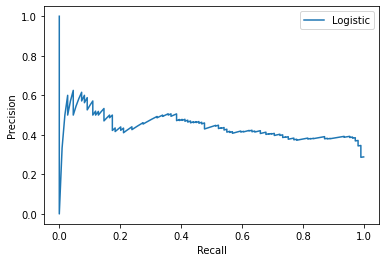

In [ ]:
precision, recall, _= precision_recall_curve(y_test, probs, pos_label=2)

# plot the precision-recall curves
plt.plot(recall, precision, label='Logistic')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()



> ROC curves should be used when there are roughly equal numbers of observations for each class. Precision-Recall curves should be used when there is a moderate to large class imbalance.



PART 2


**STEPS** 


Downloaded the ‘Diamonds’ dataset from https://www.kaggle.com/shivam2503/diamonds.
Use random seed 633.

**2.1.** Started by plotting the scatter plot of price vs carat. Analysed the Relationship

**2.2.** Divided the dataset randomly in a 70:30 ratio into a training set and a test set

**2.3.** Built a linear regression model on the training data to predict the price of a diamond given its size in carats.

* Ploted the regression line. 

**2.4.** While carat, a measure of the weight of a diamond is an important predictor of its price, it is possible that other variables that are uncorrelated with carat also have some influence. Hence, Experimented with adding such explanatory variables to the model.

**2.5.** Applied transformation on the response variable (price) or carat, or both, to help improve regression over the linear model developed in part 4

**2.6.** For each sample in the test set, predicted the price using the best model I have, and computed the MAE of the model on the test set.

**2.7.** What could be some problems using this model to estimate the price of unseen diamonds 20 years in the future

### Solution

In [ ]:
import pandas as pd 
import numpy as np
df = pd.read_csv('diamonds.csv')# input the csv file
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Solution 2.1

In [ ]:
print("Min price: "+ str(df.price.min()))
print("Max price: "+ str(df.price.max()))

Min price: 326
Max price: 18823


Text(0, 0.5, 'Carat')

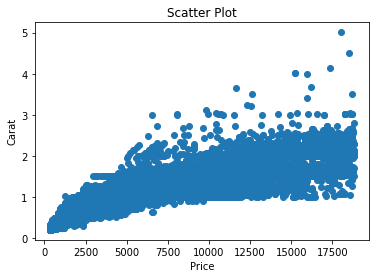

In [ ]:
import matplotlib.pyplot as plt
s = plt.scatter(df.price,df.carat)
plt.title('Scatter Plot')
plt.xlabel('Price')
plt.ylabel('Carat')



> As the price increases the carat of diamond of also increases or we can say that inversely too, as the carat increases the price also increases.



In [ ]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()


# Encode labels in categorical column.
df['cut'] = label_encoder.fit_transform(df['cut'])
df['cut'].unique()
df['clarity'] = label_encoder.fit_transform(df['clarity'])
df['clarity'].unique()
df['color'] = label_encoder.fit_transform(df['color'])
df['color'].unique()

array([1, 5, 6, 4, 2, 3, 0])

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


#### Solution 2.2

In [ ]:
# Splitting the dataset into training and test sets in the ratio 70:30
x = np.array(df.carat).reshape(-1, 1)
y = np.array(df.price).reshape(-1, 1)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state = 633)

#### Solution 2.3

In [ ]:
# Training the data using LinearRegression

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
model = regr.fit(x_train, y_train)
y_pred = model.predict(x_test)

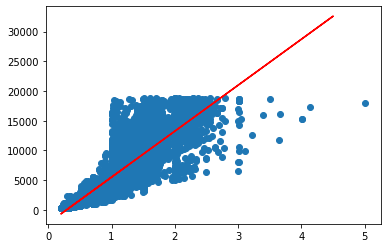

In [ ]:
# Plotting the regression line

plt.scatter(x_train,y_train)
plt.plot(x_test, y_pred, color="red")
plt.show()

In [ ]:
# Coeffecient of Determination. between 0 and 1

cod= r2_score(y_test,y_pred)
print(cod)

0.8485420619811271


In [ ]:
# Mean absolute error

from sklearn.metrics import mean_absolute_error as mae 
mean_abs_error=(mae(y_test,y_pred))
print(mean_abs_error)

1005.143117749581


In [ ]:
# MSE(Mean Squared Error) and RMSE (Root Mean Square Error)

from math import sqrt
from sklearn.metrics import mean_squared_error as mse
MSE = mse(y_test,y_pred)
RMSE = sqrt(MSE)
print(MSE)
print(RMSE)

2408922.074995888
1552.0702545297002


#### Solution 2.4

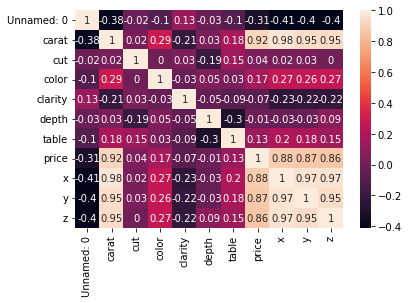

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

X,Y AND Z are highly corelated to carrat so thay will give better COD.

**CUT as predictor**

In [ ]:
x1 = np.array(df.carat).reshape(-1, 1)
y1 = np.array(df.cut).reshape(-1, 1)
from sklearn.model_selection import train_test_split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size= 0.3, random_state = 633)

In [ ]:
regr_cut = LinearRegression()
model_cut = regr_cut.fit(x1_train, y1_train)
y_pred_cut = model_cut.predict(x1_test)

In [ ]:
cod_cut= r2_score(y1_test,y_pred_cut)
print("COD for cut" + str(cod_cut))

COD for cut0.00013976494798884076


**COLOR AS PREDICTOR**

In [ ]:
x7= np.array(df.carat).reshape(-1, 1)
y7 = np.array(df.color).reshape(-1, 1)
from sklearn.model_selection import train_test_split

x7_train, x7_test, y7_train, y7_test = train_test_split(x7,y7, test_size= 0.3, random_state = 633)
regr_color= LinearRegression()
model_color = regr_color.fit(x7_train, y7_train)
y_pred_color = model_color.predict(x7_test)

cod_color= r2_score(y7_test,y_pred_color)
print(cod_color)

0.08023315687053345


**CLARITY AS PREDICTOR**

In [ ]:
x3 = np.array(df.carat).reshape(-1, 1)
y3 = np.array(df.clarity).reshape(-1, 1)
from sklearn.model_selection import train_test_split

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size= 0.3, random_state = 633)
regr_clarity= LinearRegression()
model_clarity = regr_clarity.fit(x3_train, y3_train)
y_pred_clarity = model_clarity.predict(x3_test)

cod_clarity= r2_score(y3_test,y_pred_clarity)
print(cod_clarity)

0.04429019325531214


**DEPTH AS PREDICTOR**

In [ ]:
x2 = np.array(df.carat).reshape(-1, 1)
y2 = np.array(df.depth).reshape(-1, 1)
from sklearn.model_selection import train_test_split

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size= 0.3, random_state = 633)
regr_depth = LinearRegression()
model_depth = regr_depth.fit(x2_train, y2_train)
y_pred_depth = model_depth.predict(x2_test)

cod_depth= r2_score(y2_test,y_pred_depth)
print(cod_depth)

-9.470093184171802e-05


In [ ]:
'''from matplotlib.cbook import IgnoredKeywordWarning
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot


# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression()
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)


# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()'''

**X AS PREDICTOR**

In [ ]:
x4 = np.array(df.carat).reshape(-1, 1)
y4 = np.array(df.x).reshape(-1, 1)
from sklearn.model_selection import train_test_split

x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4, test_size= 0.3, random_state = 633)
regr_x= LinearRegression()
model_x = regr_x.fit(x4_train, y4_train)
y_pred_x = model_x.predict(x4_test)

cod_x= r2_score(y4_test,y_pred_x)
print(cod_x)

0.9477751851060315


**TABLE AS PREDICTOR**

In [ ]:
x5 = np.array(df.carat).reshape(-1, 1)
y5 = np.array(df.table).reshape(-1, 1)
from sklearn.model_selection import train_test_split

x5_train, x5_test, y5_train, y5_test = train_test_split(x5,y5, test_size= 0.3, random_state = 633)
regr_table= LinearRegression()
model_table = regr_table.fit(x5_train, y5_train)
y_pred_table = model_table.predict(x5_test)

cod_table= r2_score(y5_test,y_pred_table)
print(cod_table)

0.03706306611484478


**Y AS PREDICTOR**

In [ ]:
x6= np.array(df.carat).reshape(-1, 1)
y6 = np.array(df.y).reshape(-1, 1)
from sklearn.model_selection import train_test_split

x6_train, x6_test, y6_train, y6_test = train_test_split(x6,y6, test_size= 0.3, random_state = 633)
regr_y= LinearRegression()
model_y = regr_y.fit(x6_train, y6_train)
y_pred_y = model_y.predict(x6_test)

cod_y= r2_score(y6_test,y_pred_y)
print(cod_y)

0.9481158703449367


**Z AS PREDICTOR**

In [ ]:
x8= np.array(df.carat).reshape(-1, 1)
y8 = np.array(df.z).reshape(-1, 1)
from sklearn.model_selection import train_test_split

x8_train, x8_test, y8_train, y8_test = train_test_split(x8,y8, test_size= 0.3, random_state = 633)
regr_z= LinearRegression()
model_z = regr_z.fit(x8_train, y8_train)
y_pred_z = model_z.predict(x8_test)

cod_z= r2_score(y8_test,y_pred_z)
print(cod_z)

0.9394102788602545


In [ ]:
print("Coefficient of Determination Carat vs Price: "+ str(cod))
print("\nCoefficient of Determination Cut vs Price: "+ str(cod_cut))
print("Coefficient of Determination Color vs Price: "+ str(cod_color))
print("Coefficient of Determination Clarity vs Price: "+ str(cod_clarity))
print("Coefficient of Determination Depth vs Price: "+ str(cod_depth))
print("Coefficient of Determination Table vs Price: "+ str(cod_table))
print("Coefficient of Determination X vs Price: "+ str(cod_x))
print("Coefficient of Determination Y vs Price: "+ str(cod_y))
print("Coefficient of Determination Z vs Price: "+ str(cod_z))

Coefficient of Determination Carat vs Price: 0.8485420619811271

Coefficient of Determination Cut vs Price: 0.00013976494798884076
Coefficient of Determination Color vs Price: 0.08023315687053345
Coefficient of Determination Clarity vs Price: 0.04429019325531214
Coefficient of Determination Depth vs Price: -9.470093184171802e-05
Coefficient of Determination Table vs Price: 0.03706306611484478
Coefficient of Determination X vs Price: 0.9477751851060315
Coefficient of Determination Y vs Price: 0.9481158703449367
Coefficient of Determination Z vs Price: 0.9394102788602545


The Coefficient of Determination reduses drastically for 'depth' and is very low for 'cut','color','clarity','depth','table' as well. Whereas it is higher for 'X','Y','Z'; Y being the highest.

#### Solution 2.5

77.83050776319809


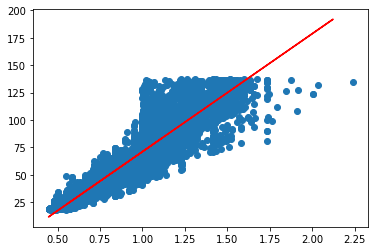

In [ ]:
x = np.sqrt(np.array(df.carat).reshape(-1, 1))
y = np.sqrt(np.array(df.price).reshape(-1, 1))
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state = 633)
model = regr.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.scatter(x_train,y_train)
plt.plot(x_test, y_pred, color="red")
MSE_square = mse(y_test,y_pred)
print(MSE_square)
plt.show()

0.06902266941097827


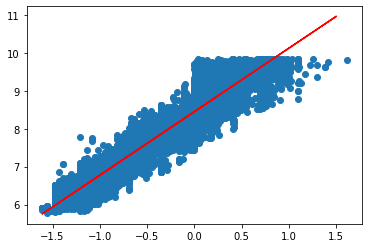

In [ ]:
x_log = np.log(np.array(df.carat).reshape(-1, 1))
y_log = np.log(np.array(df.price).reshape(-1, 1))
from sklearn.model_selection import train_test_split

x_log_train, x_log_test, y_log_train, y_log_test = train_test_split(x_log,y_log, test_size= 0.3, random_state = 633)
model = regr.fit(x_log_train, y_log_train)
y_log_pred = model.predict(x_log_test)
plt.scatter(x_log_train,y_log_train)
plt.plot(x_log_test, y_log_pred, color="red")
MSE_log = mse(y_log_test,y_log_pred)
print(MSE_log)
plt.show()

#### Solution 2.6

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_cross = np.array(df.carat).reshape(-1, 1)
y_cross = np.array(df.price).reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_cross_train, X_cross_test, y_cross_train, y_cross_test = train_test_split(X_cross,y_cross,test_size=0.2)

In [ ]:
# linear regression for comparison
scores = cross_val_score(regr, X_cross_train, y_cross_train, cv=5)
print('Cross-Validation Accuracy Scores', scores)

scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()


Cross-Validation Accuracy Scores [0.84970969 0.84432107 0.85761982 0.84724965 0.84803982]


(0.8443210662623261, 0.849388007306818, 0.8576198157735164)

In [ ]:
#RANDOM FOREST REGRESSOR comparisonn
rr = RandomForestRegressor()
RR_scores=cross_val_score(rr,X_cross_train,y_cross_train,cv=5)
print('\n')
print('Cross-Validation Accuracy Scores', RR_scores)
scores = pd.Series(RR_scores)
scores.min(), scores.mean(), scores.max()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 



Cross-Validation Accuracy Scores [0.87049851 0.86695351 0.87643973 0.86713466 0.86861756]


(0.8669535131553086, 0.8699287949906565, 0.8764397340350376)

In [ ]:
rr2 = RandomForestRegressor()
model_rr2 = rr2.fit(x_log_train, y_log_train)

y_cross_pred = model.predict(x_log_test)

MSE_cross = mse(y_log_test,y_log_pred)
print(""+ str(MSE_cross))

# Random forest performs better 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.06902266941097827


#### Solution 2.7



> Predictive models take data from the past to make future predictions. If we use the trained model after a long time for this example 20 years, the trends may have changed. The market for diamonds may have changed a lot. Availability of diamonds may have increaded or decreaded affecting the price. Countless factors can lead to variation in the price. So we cannot use a very old dataset to make prediction as it is outdated. 



> One way to overcome this issue is update the data continuously. Continual learning, also known as lifelong learning is a concept in machine learning, in which the models continuously learn and evolve based on the input of increasing amounts of data while retaining previously-learned knowledge.

Reference for continuous learning definition: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8259323/#:~:text=Continual%20learning%2C%20also%20known%20as,while%20retaining%20previously%2Dlearned%20knowledge.

